In [1]:
import pandas as pd
covid_ds = pd.read_csv("Covid Data.csv")
covid_ds

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### Let's try to understand what data says , which is not self explanatory
USMER:- Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
inmsupr: whether the patient is immunosuppressed or not. It says whether patient has good immunity or not
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
    
Below is the location to identify complete dataset
https://www.kaggle.com/datasets/meirnizri/covid19-dataset

In [2]:
# Let's check data type of data
covid_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [3]:
pd.to_datetime(covid_ds["DATE_DIED"])

/var/folders/2r/0by_8m1920dgcbbd255dzrj00000gp/T/ipykernel_4672/3601100746.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(covid_ds["DATE_DIED"])


ParserError: month must be in 1..12: 9999-99-99 present at position 5

In [4]:
# As up we have got the error as DATE_DIED have some invalid date data as 9999-99-99. It looks like sime invalid data
# need to check the percentage ratio for this invalid details
covid_ds["DATE_DIED"].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [15]:
#let's calculate percentage for this invalid data
notValidDate = len(covid_ds[covid_ds["DATE_DIED"]=="9999-99-99"])
validDate = len(covid_ds["DATE_DIED"])
percentageNotValid=(notValidDate/validDate)*100
percentageNotValid

92.66223207686622

In [16]:
# Based on upper data set date columns is not reliable as most of dates are not valid
#Let's explore other column
covid_ds

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [17]:
# Ratio of male vs female ratio
covid_ds["SEX"].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

### Percentage of survival for male female based on date died.
Sorry missed to read if it is 9999-99-99 means not died.
 so in current dataset number of people not died is notValidDate.
Let's calculate survival rate based on date column for sex.
Let's create new colum survival which will have 0 or 1 based on date column 9999-99-99




In [22]:
covid_ds["SURVIVAL"] =covid_ds.apply(lambda row: 1 if row["DATE_DIED"]=="9999-99-99" else 0,axis=1)

In [23]:
covid_ds["SURVIVAL"].value_counts(),covid_ds["DATE_DIED"].value_counts()

(1    971633
 0     76942
 Name: SURVIVAL, dtype: int64,
 9999-99-99    971633
 06/07/2020      1000
 07/07/2020       996
 13/07/2020       990
 16/06/2020       979
                ...  
 24/11/2020         1
 17/12/2020         1
 08/12/2020         1
 16/03/2021         1
 22/04/2021         1
 Name: DATE_DIED, Length: 401, dtype: int64)

In [24]:
#Percentage of survival rate is same as datedied column percentage calculated in previous section for percentageNotValid
percentSurvived=percentageNotValid
percentSurvived

92.66223207686622

In [26]:
#Now let's calculate rato for male and female in not survived
pd.crosstab(covid_ds["SURVIVAL"],covid_ds["SEX"])

SEX,1,2
SURVIVAL,,
0,27402,49540
1,497662,473971


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

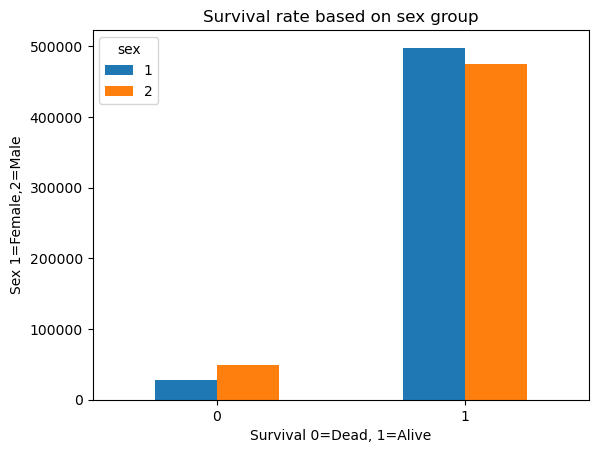

In [41]:
pd.crosstab(covid_ds["SURVIVAL"],covid_ds["SEX"],rownames=['Survival'],colnames=['sex']).plot.bar(rot=0);
plt.title("Survival rate based on sex group");
plt.xlabel("Survival 0=Dead, 1=Alive");
plt.ylabel("Sex 1=Female,2=Male");

In [42]:
#Let's check details for intubed patient
covid_ds["INTUBED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

### value details for intubed
In the context of the COVID-19 dataset you provided, the values for the 'intubed' column have the following meanings:

1: Intubated (the patient has been placed on a ventilator or breathing machine)
2: Not intubated (the patient has not been placed on a ventilator or breathing machine)
97: Not applicable or information not available (this code is used when the intubation status is not applicable to the patient or when the information is missing)
99: Unknown (this code is used when the intubation status is unknown or when the information is missing)
These values represent the different states or categories related to whether a patient has been intubated as part of their COVID-19 treatment. It is important to note that the specific coding and meanings may vary across different datasets, so it is always recommended to refer to the documentation or data dictionary provided with the dataset to ensure accurate interpretation.

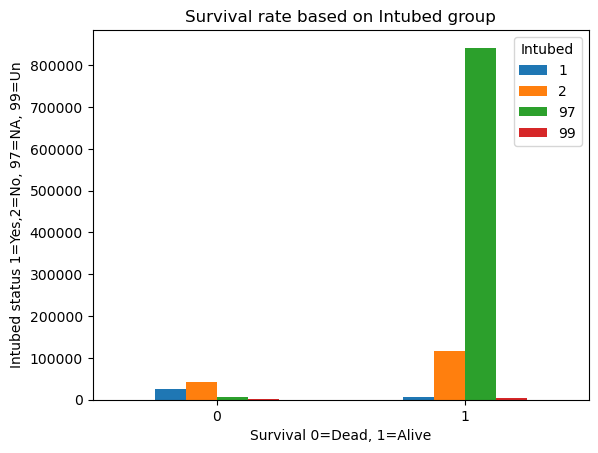

In [47]:
#Let's plot for Intubed patient same thing
pd.crosstab(covid_ds["SURVIVAL"],covid_ds["INTUBED"],rownames=['Survival'],colnames=['Intubed']).plot.bar(rot=0);
plt.title("Survival rate based on Intubed group");
plt.xlabel("Survival 0=Dead, 1=Alive");
plt.ylabel("Intubed status 1=Yes,2=No, 97=NA, 99=Un");

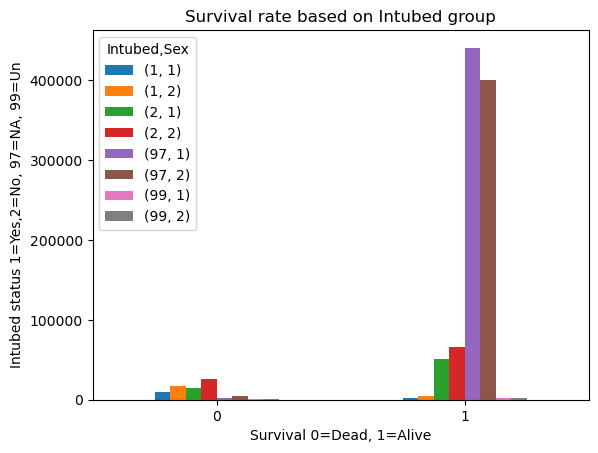

In [46]:
#Let's plot for Intubed patient same thing
pd.crosstab(covid_ds["SURVIVAL"],[covid_ds["INTUBED"],covid_ds["SEX"]],rownames=['Survival'],colnames=['Intubed','Sex']).plot.bar(rot=0);
plt.title("Survival rate based on Intubed group");
plt.xlabel("Survival 0=Dead, 1=Alive");
plt.ylabel("Intubed status 1=Yes,2=No, 97=NA, 99=Un");

In [ ]:
pd.crosstab(covid_ds["SURVIVAL"],covid_ds["INTUBED"],rownames=['Survival'],colnames=['Intubed']).plot.bar(rot=0);
plt.title("Survival rate based on Intubed group");
plt.xlabel("Survival 0=Dead, 1=Alive");
plt.ylabel("Intubed status 1=Yes,2=No, 97=NA, 99=Un");

From upper data looks survival rate after intubation is still low but some people survived as well.
Let's understand survival rate after intubation based on sex rate


In [ ]:
# Let's understand data for USMER
